In [1]:
# Are movies that are more popular rated higher than movies that are less popular?

"""
1. Load the data 
1a. Extract ratings only

2. Data Cleaning
2a. Count all nan values for each movies
2b. Get the total number of ratings for each movie: len(ratings) - nan_counts
2c. Get the median of the total number of ratings for each movie
2d. Split the data into less popular and more popular and extract the index number for both
2e. Get movie ratings for less popular and more popular using the index^
2f. Make all less popular movie ratings into one sample and do the same for the more popular movies

3. Mann-Whitney U test

4. Plotting the data

"""

In [287]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [288]:
# 1. Loading the data
df = pd.read_csv('movieReplicationSet.csv', sep=',')
ratings = df.iloc[:,:400]
ratings.head(5)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN


In [300]:
# 2. Data Cleaning

# 2a. Count all nan values for each movies
nan_val_counts = pd.DataFrame(ratings.isna().sum())

# 2b. Get the total number of ratings for each movie: len(ratings) - nan_counts
total_num_ratings = pd.DataFrame(len(ratings) - nan_val_counts)

# 2c. Get the median of the total number of ratings for each movie
med = np.median(total_num_ratings.values)

# 2d. Split the data into less popular and more popular and extract the index number for both
less_pop_index = np.array(np.where(total_num_ratings[0] <= med)).flatten() 
more_pop_index = np.array(np.where(total_num_ratings[0] > med)).flatten()

# 2e. Get movie ratings for less popular and more popular using the index above
less_pop_movie_ratings = ratings.iloc[:,less_pop_index]
more_pop_movie_ratings = ratings.iloc[:,more_pop_index]

# 2f. Make all less popular movie ratings into one sample and do the same for the more popular movies
D1 = np.array(less_pop_movie_ratings.values).flatten()
D1 = D1[np.logical_not(np.isnan(D1))]

D2 = np.array(more_pop_movie_ratings.values).flatten()
D2 = D2[np.logical_not(np.isnan(D2))]

total_num_ratings

,0
The Life of David Gale (2003),76
Wing Commander (1999),71
Django Unchained (2012),453
Alien (1979),289
Indiana Jones and the Last Crusade (1989),463
...,...
Patton (1970),61
Anaconda (1997),198
Twister (1996),174
MacArthur (1977),61


In [296]:
# 3. Mann-whitney U test between less popular movies and more popular movies
u1,p1 = stats.mannwhitneyu(D1, D2)
u1,p1

In [298]:
u1,p1

(741899855.5, 0.0)

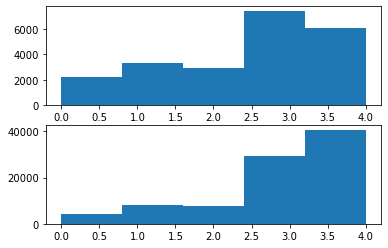

In [299]:
plt.subplot(2,1,1)
plt.hist(D1, bins=5)
plt.subplot(2,1,2)
plt.hist(D2, bins=5)
plt.show()